### Example Multiple Linear Regression 4.13

Consider the left-hand panel of the Figure, in which the **mpg** (gas mileage in miles per gallon) versus **horsepower** is shown for a number of cars in the **Auto** data set. The blue line represents the linear regression fit.

In [12]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

# Load data
df = pd.read_csv(
    'data/Auto.csv')

# Define the linear model:
x = df['horsepower']
y = df['mpg']

# Fit model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        09:25:10   Log-Likelihood:                -843.24
No. Observations:                 392   AIC:                             1690.
Df Residuals:                     390   BIC:                             1698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9727      0.305     55.660      0.000      16.373      17.572
horsepower    -0.0671      0.003    -24.489      0.000      -0.072      -0.062
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

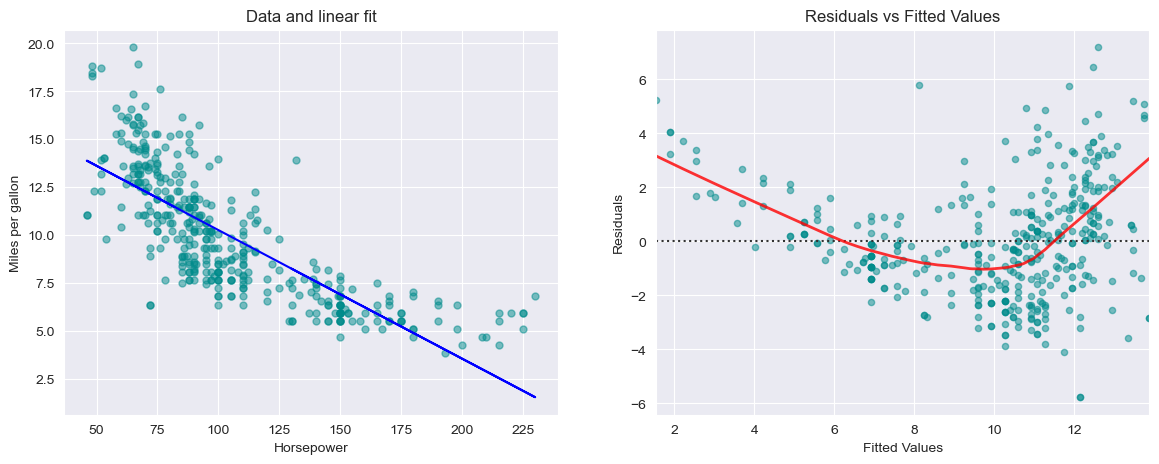

In [13]:
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Scatter data and linear fit
ax1 = fig.add_subplot(1, 2, 1)
# Scatter data
plt.plot(x, y, marker='o', linestyle='None',
         color='darkcyan', markersize='5', alpha=0.5,
         label="Scatter data")
# Linear fit
plt.plot(x, model.fittedvalues, 'b-', label="Linear fit")
# Set labels
ax1.set_title('Data and linear fit')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Miles per gallon')

# Plot right figure: Residuals vs fitted data
ax2 = fig.add_subplot(1, 2, 2)
# Residuals vs fitted value, using seaborn
ax2 = sns.residplot(
    x=model.fittedvalues, y=model.resid,
    data=df, lowess=True,
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels
ax2.set_title('Residuals vs Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Values')

# Show plot
plt.show()

A simple approach for incorporating non-linear associations in a linear model is to include transformed versions of the predictors in the model. For example, the points in the figure seem to have a *quadratic* shape, suggesting that a model of the form
\begin{equation*}
mpg = \beta_{0} + \beta_{1} \cdot horsepower + \beta_{2} \cdot horsepower^{2}+\epsilon
\end{equation*}

may provide a better fit. The equation involves predicting **mpg** using a non-linear function of **horsepower**. 

*But it is still a linear model!*

That is, the current model is simply a multiple linear regression model with
\begin{equation*}
X_{1}=horsepower 
\qquad\text{and}\qquad  
X_{2}=horsepower^{2}
\end{equation*}

So we can use standard linear regression software to estimate $\beta_{0}$, 
$\beta_{1}$, and $\beta_{2}$ in order to produce a non-linear fit. 

In [14]:
# Define the linear model:
x = pd.DataFrame({
    'horsepower' : df['horsepower'], 
    'horsepower^2' : (df['horsepower'] * df['horsepower'])})
y = df['mpg']

# Fit model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()

# Print summary:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           5.40e-99
Time:                        09:25:10   Log-Likelihood:                -797.76
No. Observations:                 392   AIC:                             1602.
Df Residuals:                     389   BIC:                             1613.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.1825      0.765     31.604   

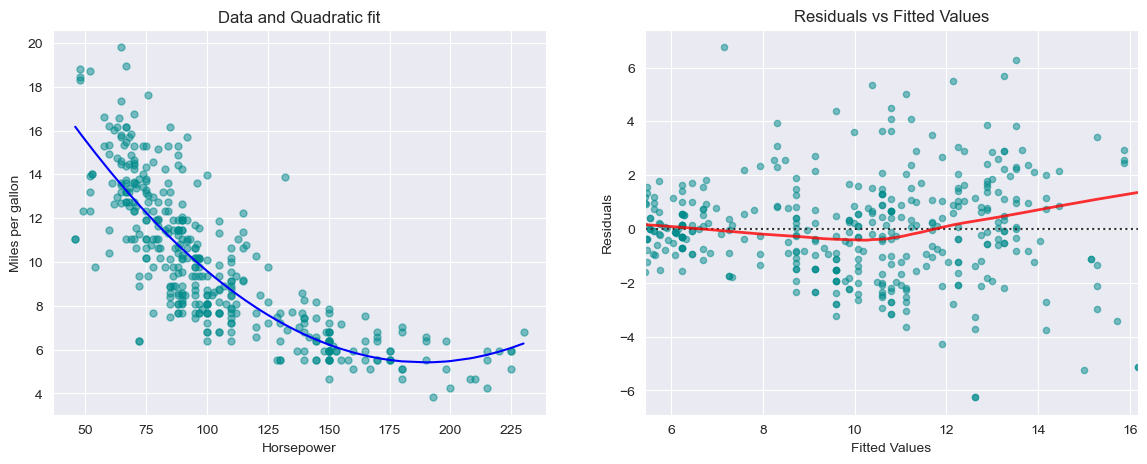

In [15]:
# Create figure:
fig = plt.figure(figsize=(14, 5))

# Plot left figure: Scatter data and linear fit
ax1 = fig.add_subplot(1, 2, 1)
# Scatter data
plt.plot(x['horsepower'], y, marker='o', linestyle='None',
         color='darkcyan', markersize='5', alpha=0.5,
         label="Scatter data")
# Quadratic fit
x_quad_fit = x.sort_values(by='horsepower')
y_quad_fit = (model.params['const'] 
              + x_quad_fit['horsepower'] * model.params['horsepower']
              + x_quad_fit['horsepower^2'] * model.params['horsepower^2'])
plt.plot(x_quad_fit['horsepower'], y_quad_fit, 
         'b-', label="Quadratic fit")
# Set labels 
ax1.set_title('Data and Quadratic fit')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Miles per gallon')

# Plot right figure: Residuals vs fitted data
ax2 = fig.add_subplot(1, 2, 2)
# Residuals vs fitted value, using seaborn
ax2 = sns.residplot(
    x=model.fittedvalues, y=model.resid,  
    data=df, lowess=True, 
    scatter_kws={'color': 'darkcyan', 's': 20, 'alpha': 0.5},
    line_kws={'color': 'red', 'lw': 2, 'alpha': 0.8})
# Set labels 
ax2.set_title('Residuals vs Fitted Values')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('Fitted Values')

# Show plot
plt.show()

The blue curve shows the resulting quadratic fit to the data. The quadratic fit appears to be substantially better than the fit obtained before, where just the linear term is included. The $ R^{2} $ of the quadratic fit is $ 0.688 $, compared to $ 0.606 $ for the linear fit, and the p-value for the quadratic term is highly significant.

Let us as well perform an ANOVA-analysis 


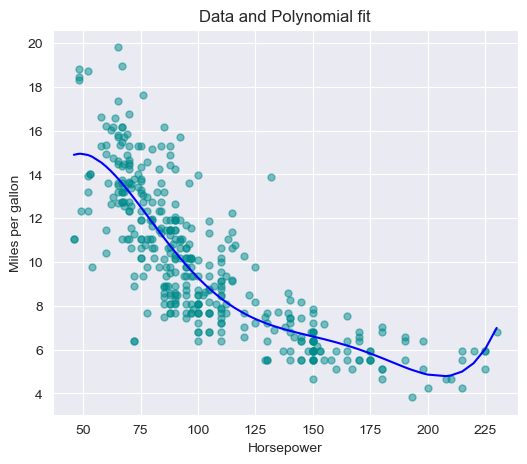

In [16]:
# Define the linear model:
x = pd.DataFrame({
    'horsepower' : df['horsepower'], 
    'horsepower^2' : (df['horsepower'] * df['horsepower']), 
    'horsepower^3' : (df['horsepower'] ** 3), 
    'horsepower^4' : (df['horsepower'] ** 4), 
    'horsepower^5' : (df['horsepower'] ** 5), 
    })
y = df['mpg']

# Fit model
x_sm = sm.add_constant(x)
model =sm.OLS(y, x_sm).fit()

# Print summary:
# print(model.summary())
# Create figure:
fig = plt.figure(figsize=(6, 5))

# Plot left figure: Scatter data and polynomial fit
ax1 = fig.add_subplot(1, 1, 1)
# Scatter data
plt.plot(x['horsepower'], y, marker='o', linestyle='None',
         color='darkcyan', markersize='5', alpha=0.5,
         label="Scatter data")
# Polynomial fit
x_quad_fit = x.sort_values(by='horsepower')
y_quad_fit = (model.params['const'] 
              + x_quad_fit['horsepower'] * model.params['horsepower']
              + x_quad_fit['horsepower^2'] * model.params['horsepower^2']
              + x_quad_fit['horsepower^3'] * model.params['horsepower^3'] 
              + x_quad_fit['horsepower^4'] * model.params['horsepower^4'] 
              + x_quad_fit['horsepower^5'] * model.params['horsepower^5'])

plt.plot(x_quad_fit['horsepower'], y_quad_fit, 
         'b-', label="Polynomial fit")
# Set labels 
ax1.set_title('Data and Polynomial fit')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('Miles per gallon')

# Show plot
plt.show()

The p-value for the null hypothesis, $\beta_2=0$, is approximately zero. We thus reject the null hypothesis and conclude that including the quadratic term in the regression model is essential for fitting an appropriate model to the data.

If including $horsepower^{2}$ led to such a big improvement in the model, why not include $horsepower^{3}$, $horsepower^{4}$ or even $horsepower^{5}$? The  Figure displays the fit that results from including all polynomials up to fifth degree in the model. The resulting fit seems unnecessarily wiggly - that is, it is unclear that including the additional terms really has led to a better fit to the data.

The approach that we have just described for extending the linear model to accomodate non-linear relationships is known as *polynomial regression*, since we have included polynomial functions of the predictors in the regression model. 